In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_raw = pd.read_csv(url)

df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Step 1: Handling Missing Values
# Checking missing values
print("Missing values before handling:")
print(df_raw.isnull().sum())

# Copy dataset
df_step1 = df_raw.copy()

# Numerical feature: mean imputation
df_step1["Age"] = df_step1["Age"].fillna(df_step1["Age"].mean())

# Categorical feature: mode imputation
df_step1["Embarked"] = df_step1["Embarked"].fillna(df_step1["Embarked"].mode()[0])

print("\nMissing values after handling:")
print(df_step1.isnull().sum())


Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


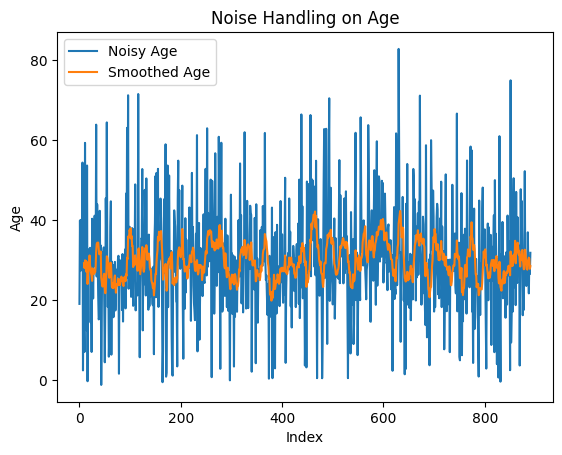

In [3]:
#Step 2: Noise Detection and Handling

df_noise = df_step1.copy()

# Selected a numerical feature (Age) and added artificial noise
noise = np.random.normal(0, 2, size=len(df_noise))
df_noise["Age_noisy"] = df_noise["Age"] + noise

# Apply moving average smoothing
df_noise["Age_smooth"] = df_noise["Age_noisy"].rolling(window=10).mean()

# Plot before and after smoothing
plt.plot(df_noise["Age_noisy"], label="Noisy Age")
plt.plot(df_noise["Age_smooth"], label="Smoothed Age")
plt.legend()
plt.title("Noise Handling on Age")
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()


In [4]:
# Step 3: Outlier Detection and Handling
# Detect outliers using Z-score
z_scores = np.abs(stats.zscore(df_step1["Fare"]))

# Identifying outliers
outliers = df_step1[z_scores > 3]
outliers.head()

# Removing the outliers
df_no_outliers = df_step1[z_scores <= 3]

print("Original data size:", df_step1.shape)
print("After removing outliers:", df_no_outliers.shape)

Original data size: (891, 12)
After removing outliers: (871, 12)


In [5]:
# Step 4: Data Transformation
# Transform categorical features using one-hot encoding
df_transformed = pd.get_dummies(df_no_outliers, columns=["Sex", "Embarked"])

df_transformed.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [6]:
# Step 5: Feature Scaling
# Selected numerical features
features = df_transformed[["Age", "Fare", "SibSp"]]

# Standardization (Z-score)
scaler_std = StandardScaler()
standardized = scaler_std.fit_transform(features)

# Normalization(Min–Max scaling)
scaler_mm = MinMaxScaler()
normalized = scaler_mm.fit_transform(features)

print("Standardized values (first 5 rows):\n", standardized[:5])
print("\nNormalized values (first 5 rows):\n", normalized[:5])

Standardized values (first 5 rows):
 [[-0.58915177 -0.65725621  0.43804266]
 [ 0.64004202  1.52562306  0.43804266]
 [-0.28185332 -0.63424563 -0.47037438]
 [ 0.40956818  0.90575888  0.43804266]
 [ 0.40956818 -0.62998441 -0.47037438]]

Normalized values (first 5 rows):
 [[0.27117366 0.04397492 0.125     ]
 [0.4722292  0.4323693  0.125     ]
 [0.32143755 0.04806914 0.        ]
 [0.43453129 0.32207838 0.125     ]
 [0.43453129 0.04882733 0.        ]]
